In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
#Reading the Dataset
xls = pd.ExcelFile('HospitalDatabase .xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR = pd.read_excel(xls, 'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

# 2.Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [47]:
df_FNLN=df_PA
df_FNLN.iloc[101:201,1:3]

,FirstName,LastName
841,Kuvalis,Group
842,Hauck,Antognazzi
843,Silvester,Restaurant
844,Roselin,Group
845,Funk,McGarvey
846,Hauck,Rubbens
847,Ediva,Dyson
848,Hauck,Bitcheno
849,Selinda,Heindrick
854,Audi,Siseland


# 6.Create a jointplot on expected mortality & expected length of stay.

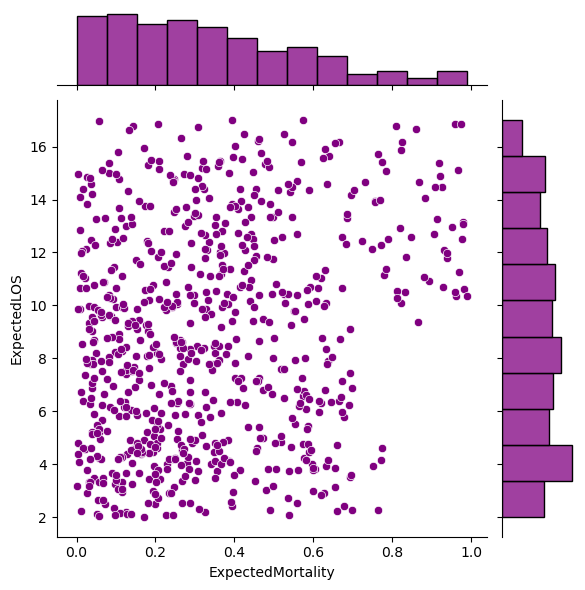

In [48]:
df_EMEL=df_RR
sns.jointplot(data=df_EMEL,x='ExpectedMortality',y='ExpectedLOS',color='PURPLE')
plt.show()

# 10.Create a boxplot on ExpectedLOS by taking service into account.

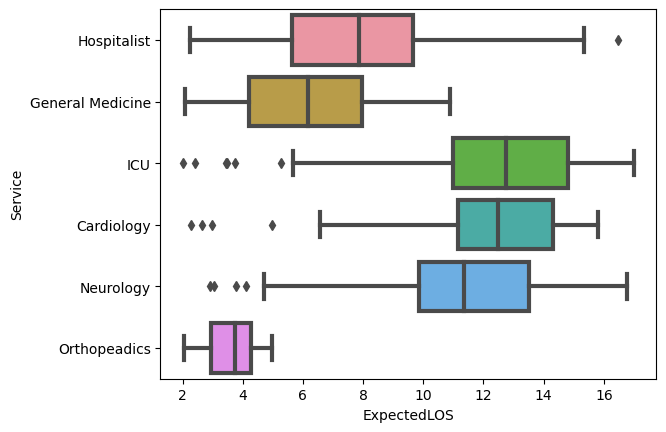

In [49]:
#create your own color array
my_colors = ["#9b59b6", "#3498db", 
            "#2ecc71", "#006a4e"]
  
# add color array to set_palette
# function of seaborn
sns.set_palette( my_colors )
df_ELOS=df_RR  
sns.boxplot(x='ExpectedLOS',y='Service',data=df_ELOS,linewidth=3)
plt.show()

# 14.Find the number of null values in BloodPressureSystolic column. 

In [50]:
df_BPS=df_AV
df_BPS['BloodPressureSystolic'].isnull().sum()

124

# 18.Add column 'Age' in Patient table.

In [51]:
from datetime import date
df_PT=df_PA
df_PT['Age'] = 1
df_PT
def calculate_age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

df_PT['Age'] = df_PT['DateOfBirth'].apply(calculate_age)
df_PT

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
25,26,Sally,Bing,1972-08-03 00:05:39.560,Female,White,Spanish,50
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,55
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,62
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,62
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56
...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,52
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,59


# 22.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.


In [52]:
df_ACEDD=df_EDV
df_ACEDD[["PatientID","Acuity","EDDisposition"]]
Patient_ct=df_ACEDD.groupby(['Acuity','EDDisposition'])['PatientID'].count().reset_index(name='NoOfPatient')
#print(Patient_ct)
print(Patient_ct.to_string(index=False))

 Acuity EDDisposition  NoOfPatient
      1      Admitted           32
      1    Discharged          558
      2      Admitted          116
      2    Discharged           66
      3      Admitted           81
      4      Admitted          107
      4    Discharged           30
      5      Admitted          179
      5    Discharged           30


# 26.Using arrays and loops, find the count of patients based on gender.

In [53]:
column_as_np=df_PA[df_PA.columns[4]].to_numpy()
Male_count = 0
Female_count = 0
for element in column_as_np:
    if element == "Male":
     Male_count += 1
    elif element == "Female":
     Female_count += 1
print("Male_count:",Male_count,"Female_count:",Female_count)            

Male_count: 0 Female_count: 122


# 30.Which patient id has most entries in readmission registry.

In [54]:
df_ENTRIES=df_RR
df_pc = df_ENTRIES.groupby(['PatientID'])['PatientID'].count().reset_index(name='ptcount')
df_max=df_pc[df_pc.ptcount == df_pc.ptcount.max()]
print(df_max.to_string(index=False))

 PatientID  ptcount
        23        3


# 34.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.


In [55]:
array=np.arange(1,31).reshape(6,5)
print(array[2:4,0:2])

[[11 12]
 [16 17]]


# 38.Number of patients on 'Transfer' based on primary diagnosis.


In [56]:
df_TPD=df_D
df_pt=df_TPD[['PatientID','DischargeDisposition','PrimaryDiagnosis']]
df_transferpt = df_pt[df_pt.DischargeDisposition == "Transfer"]
Transfer_Patient=df_transferpt.groupby(['PrimaryDiagnosis'])['PrimaryDiagnosis'].count().reset_index(name='count')
print(Transfer_Patient)


   PrimaryDiagnosis  count
0              Afib      1
1          Diabetes      7
2               Flu      2
3     Heart Failure      9
4  Knee Replacement      1
5        Laceration      1
6              Pain      1
7         Pneumonia      8
8            Stroke      9


# 42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.


In [57]:
df_DETAILS=df_P.loc[((df_P['ProviderID'] >= 11) & (df_P['ProviderID'] <= 20) )
             & (df_P['ProviderSpecialty'] == 'Surgery')]
print(df_DETAILS.to_string(index=False))

 ProviderID    ProviderName ProviderSpecialty     ProviderDateOnStaff
         11    Kim Kimberly           Surgery 1998-05-10 14:47:29.468
         12        Sarah Ab           Surgery 1998-08-18 05:22:40.762
         13 Abigail Marriot           Surgery 1998-11-08 12:25:45.705
         14         Dave Yu           Surgery 1999-06-26 16:18:57.436
         15 Christian Saint           Surgery 2000-08-27 00:12:40.326
         16    Perry Pardon           Surgery 2001-02-13 11:49:17.862


# 46.Write a code to split a sentence into words using regex.


In [58]:
Sentence = "John, is learning Python!"
x = re.split("\s",Sentence)
print(x)
for y in x:
    print(y)

['John,', 'is', 'learning', 'Python!']
John,
is
learning
Python!


# 50.Which departmentID has maximum number of visits scheduled.


In [59]:
df_MAXIMUM=df_AV
df_NoOfVisitsScheduled = df_MAXIMUM.groupby(['VisitDepartmentID'])['VisitDepartmentID'].count().reset_index(name='Visitcount')
df_MaxVisits=df_NoOfVisitsScheduled[df_NoOfVisitsScheduled.Visitcount == df_NoOfVisitsScheduled.Visitcount.max()]
print(df_MaxVisits.to_string(index=False))


 VisitDepartmentID  Visitcount
                11         102


# 54.Mortality O:E


In [60]:
df_DEXTD = df_D
df_DEXTD['ObservedMortality'] = 1
df_DEXTD
def calculate_OM(DischargeDisposition):
    if DischargeDisposition == 'Expired': 
     return 1 
    else: 
     return 0

df_DEXTD['ObservedMortality'] = df_DEXTD['DischargeDisposition'].apply(calculate_OM)
df_DEXTD
ObservedMortality_sum = df_DEXTD['ObservedMortality'].sum()
print("ObservedMortality_sum:",ObservedMortality_sum)
ExpectedMortality_sum = df_DEXTD['ExpectedMortality'].sum()
print("ExpectedMortality_sum:",ExpectedMortality_sum)
mortalityO_E=ObservedMortality_sum/ExpectedMortality_sum
print("mortalityO_E:",mortalityO_E)

ObservedMortality_sum: 104
ExpectedMortality_sum: 243.40526924839037
mortalityO_E: 0.4272709474250124


# 58.Display total count of patients service wise based on gender.


In [61]:
df_PA = pd.read_excel(xls, 'Patients')
df_Total1=df_D[['PatientID','Service']]
df_Total2=df_PA[['PatientID','Gender']]
df_merge=pd.merge(df_Total1,df_Total2,how='inner',on ='PatientID')

df_total=df_merge.groupby(['Service','Gender'])['Gender'].count().reset_index(name='countOfPatient')
df_total

,Service,Gender,countOfPatient
0,Cardiology,Female,41
1,Cardiology,Male,54
2,General Medicine,Female,114
3,General Medicine,Male,149
4,Hospitalist,Female,35
5,Hospitalist,Male,66
6,ICU,Female,65
7,ICU,Male,86
8,Neurology,Female,34
9,Neurology,Male,31


# 62.Display the data for all 'White Female' patients above the age of 50.


In [62]:
from datetime import date
df_WFP=df_PA
df_WFP['Age'] = 1
df_WFP
def calculate_age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

df_WFP['Age'] = df_WFP['DateOfBirth'].apply(calculate_age)

df_WFP=df_WFP.loc[(df_WFP['Race'] == 'White') & (df_WFP['Gender'] == 'Female') 
             & (df_WFP['Age'] >= 50)]
df_WFP
#print(df_PA.to_string(index=False))

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
25,26,Sally,Bing,1972-08-03 00:05:39.560,Female,White,Spanish,50
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,55
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,62
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,62
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56
...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,52
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,59


# 66.np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.


In [18]:
a=np.arange(1,31).reshape(6,5)

print(a[[0,4,5],3:5])



[[ 4  5]
 [24 25]
 [29 30]]


# 70.Plot a graph to show the distribution of expected mortality.


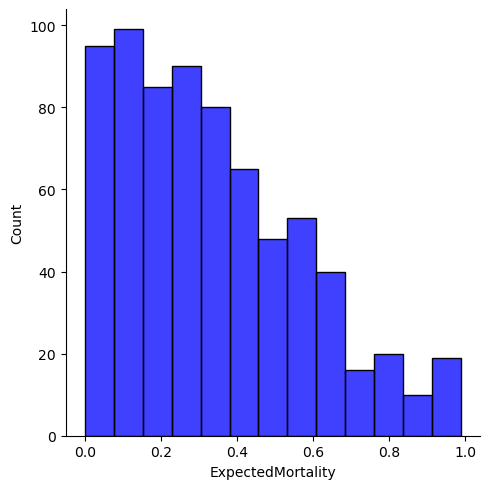

In [64]:
df_DEM=df_RR
sns.displot(df_DEM['ExpectedMortality'],color = 'blue')
plt.show()

# 74.Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)


In [72]:
import psycopg2

conn = psycopg2.connect(
   database="hospital_db", user='postgres', password='12345', host='::1', port= 5432
)
cursor = conn.cursor()

cursor.execute('''Select distinct(extract(year from "DateofVisit")) from "AmbulatoryVisits" ''')
# Fetch all rows from database
record = cursor.fetchall()
print("Data from Database:- ", record)
conn.commit()
cursor.close()
conn.close()

Data from Database:-  [(Decimal('2019'),)]


<img src="C:\Users\sadha\OneDrive\Pictures\Screenshots\2023-01-11 (1).png" alt="Alternative text" />

# 78.Find reasonForVisit with highest count of acuity 5 patients.


In [65]:
df2=df_EDU[['ReasonForVisit','Acuity']]
df3=df2.loc[(df2['Acuity'] == 5)]
df4=df3.groupby(['ReasonForVisit','Acuity'])['Acuity'].count().reset_index(name='CountOfAcuity')
df5=df4[df4.CountOfAcuity == df4.CountOfAcuity.max()]
print(df5)


  ReasonForVisit  Acuity  CountOfAcuity
2     Chest Pain       5             53
